# Trading Algorithm Exercise 
** This is an extremely open exercise and there are lots of ways to do it! Please feel free to just skip to the solutions to treat it as an example code along. If you attempt the exercise, do not expect the example solution to exactly match up to your solution. You may have performed much better (or much worse)! **

## Your Task

Your manager wants to see if [Bollinger Bands](https://en.wikipedia.org/wiki/Bollinger_Bands) are still a meaningful technical analysis strategy on their own. For this exercise, you will be testing *Johnson and Johnson* sid(4151).Specifically, your manager has decided he wants set 100% of the portfolio to go long when the stock price is below 2 times the 20 day rolling standard deviation subtracted from the 20 day moving average, and go 100% short of the portfolio on that stock when the current price is above 2 times the 20 day rolling standard deviation added on to the 20 day moving average. The check for this signal event should only happen once per day. This is probably a very unreasonable strategy, but the main point of this is to exercise your ability to write out backtest algorithms with Quantopian.

## Time Frame

You should use the following time frame for this exercise (so you can at least have a reasonable comparison to the solutions, but feel free to play around with this!)

#### BACKTEST START:  Jul-20-2014
#### BACKTEST END: Jul-20-2017

In [1]:
import quandl
import numpy as np
import pandas as pd
import pandas_datareader as web
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
start = '07-20-2014'
end = '07-20-2017'

In [8]:
jnj = web.data.get_data_yahoo('JNJ', start = pd.to_datetime(start), end = pd.to_datetime(end))

In [9]:
# jnj = quandl.get('WIKI/JNJ', start_date = start, end_date = end)

In [11]:
jnj.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-07-21,101.580002,101.019997,101.440002,101.269997,6379900.0,83.764420
2014-07-22,102.540001,101.779999,101.910004,102.470001,6554100.0,84.757004
2014-07-23,102.930000,101.879997,102.800003,102.190002,4815300.0,84.525414
2014-07-24,102.730003,102.019997,102.339996,102.199997,5177200.0,84.533669
2014-07-25,102.400002,101.800003,102.269997,102.110001,3951500.0,84.459213


In [12]:
# Bollinger Bands
df = jnj
# 20 Days close moving average

df['Close 20d MA'] = df['Adj Close'].rolling(20).mean()

# Upper = 20 days MA + 2*(std over 20 days)

df['Upper'] = df['Close 20d MA'] + (2*df['Adj Close'].rolling(20).std())

# Lower = 20 days MA - 2*(std over 20 days)

df['Lower'] = df['Close 20d MA'] - (2*df['Adj Close'].rolling(20).std())


In [13]:
df

,High,Low,Open,Close,Volume,Adj Close,Close 20d MA,Upper,Lower
Date,,,,,,,,,
2014-07-21,101.580002,101.019997,101.440002,101.269997,6379900.0,83.764420,NaN,NaN,NaN
2014-07-22,102.540001,101.779999,101.910004,102.470001,6554100.0,84.757004,NaN,NaN,NaN
2014-07-23,102.930000,101.879997,102.800003,102.190002,4815300.0,84.525414,NaN,NaN,NaN
2014-07-24,102.730003,102.019997,102.339996,102.199997,5177200.0,84.533669,NaN,NaN,NaN
2014-07-25,102.400002,101.800003,102.269997,102.110001,3951500.0,84.459213,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2017-07-14,133.000000,131.740005,132.000000,132.600006,4383100.0,119.231941,120.095148,122.940127,117.250169
2017-07-17,132.929993,131.750000,132.710007,132.149994,4939400.0,118.827271,119.996235,122.874585,117.117886
2017-07-18,134.949997,131.080002,131.619995,134.460007,10256000.0,120.904388,120.013768,122.910629,117.116908


<AxesSubplot:xlabel='Date'>

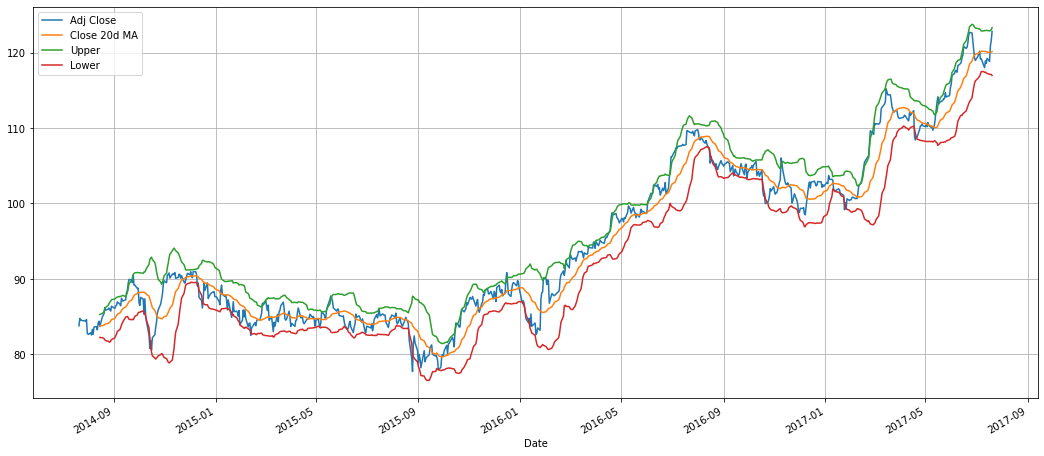

In [17]:
df[['Adj Close','Close 20d MA','Upper','Lower']].plot(figsize=(18,8),grid=1)